# Name:Maharshi Hirenkumar Mehta 
#Lab-2-ex3
#Student Number:N01609977

In [2]:
#import essential libraries 
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
sns.set()

In [4]:
data = fetch_20newsgroups()
text_categories = data.target_names
#  training dataset
train_data = fetch_20newsgroups(subset="train",categories=text_categories)
#  test dataset
test_data = fetch_20newsgroups(subset="test",categories=text_categories)


In [5]:
# the categories
text_categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
print("We have {} unique classes".format(len(text_categories)))
print("We have {} training samples".format(len(train_data.data)))
print("We have {} test samples".format(len(test_data.data)))

We have 20 unique classes
We have 11314 training samples
We have 7532 test samples


In [7]:
print(test_data.data[5])


From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [8]:
#  the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data.data, train_data.target)
predicted_categories = model.predict(test_data.data)

In [9]:
print(np.array(test_data.target_names)[predicted_categories])


['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


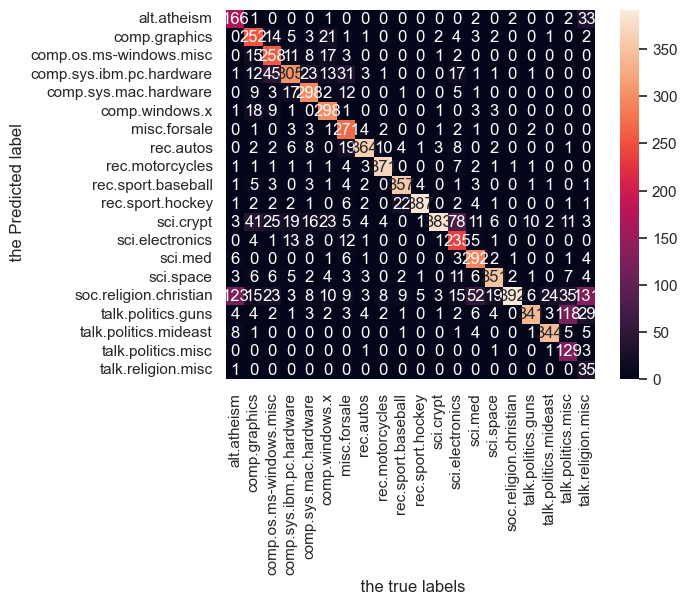

In [10]:
# heatmap
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel(" the true labels")
plt.ylabel(" the Predicted label")
plt.show()

In [11]:
print("The accuracy of the model is {}".format(accuracy_score(test_data.target,predicted_categories)))

The accuracy of the model is 0.7738980350504514


In [12]:
 # custom function to check the model for predections
def my_predictions(my_sentence, model):
  all_categories_names = np.array(data.target_names)
  prediction = model.predict([my_sentence])
  return all_categories_names[prediction]

In [18]:
my_sentence11 = 'Are you good in Poker?'
print(my_predictions(my_sentence11, model))

['soc.religion.christian']
